<a href="https://colab.research.google.com/github/KamilBienias/data-science/blob/main/training/web_scraping/tania_ksiazka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
from collections import Counter
from bs4 import BeautifulSoup
import requests
from matplotlib import pyplot as plt

In [58]:
print("Znajduję książki zawierające w tytule słowa data science z https://www.taniaksiazka.pl/Szukaj/q-data+science/page-1")
print("Tych stron jest 9. Wybrałem tylko te książki, które mają kategorię: \"Oprogramowanie - bazy danych\" lub \"Informatyka\" ")

Znajduję książki zawierające w tytule słowa data science z https://www.taniaksiazka.pl/Szukaj/q-data+science/page-1
Tych stron jest 9. Wybrałem tylko te książki, które mają kategorię: "Oprogramowanie - bazy danych" lub "Informatyka" 


In [59]:
def scrape(num_pages=9):

    base_url = "https://www.taniaksiazka.pl/Szukaj/q-data+science/page-"

    books = []

    for page_num in range(1, num_pages + 1):
        print("souping page:", page_num)
        url = base_url + str(page_num)
        soup = BeautifulSoup(requests.get(url).text, 'html5lib')

        all_links_with_bazy_danych = [a
                                      for a in
                                      soup("a", {
                                        #   "class": "ecommerce-datalayer product-title",
                                                 "data-category": "Oprogramowanie - bazy danych"})]

        all_links_with_informatyka = [a
                                      for a in
                                      soup("a", {
                                        #   "class": "ecommerce-datalayer product-title",
                                                 "data-category": "Informatyka"})]
        books.append(all_links_with_bazy_danych)
        books.append(all_links_with_informatyka)

    return books

In [60]:
def get_year(book):
    """book["date"] looks like 'November 2014' so we need to
    split on the space and then take the second piece"""
    return int(book["date"].split()[1])

def plot_years(plt, books):
    # 2014 is the last complete year of data (when I ran this)
    year_counts = Counter(get_year(book) for book in books
                          if get_year(book) <= 2014)

    years = sorted(year_counts)
    book_counts = [year_counts[year] for year in x]
    plt.bar([x - 0.5 for x in years], book_counts)
    plt.xlabel("year")
    plt.ylabel("# of data books")
    plt.title("Data is Big!")
    plt.show()

souping page: 1
souping page: 2
souping page: 3
souping page: 4
souping page: 5
souping page: 6
souping page: 7
souping page: 8
souping page: 9
Tytuł:

Cena: 54.94
Kategoria: Oprogramowanie - bazy danych
Tytuł:
Data science od podstaw analiza danych w pythonie wyd. 2
Cena: 54.94
Kategoria: Oprogramowanie - bazy danych
Tytuł:
do koszyka
Cena: 54.94
Kategoria: Oprogramowanie - bazy danych
Tytuł:

Cena: 40.18
Kategoria: Oprogramowanie - bazy danych
Tytuł:
Algorytmy data science siedmiodniowy przewodnik wyd. 2
Cena: 40.18
Kategoria: Oprogramowanie - bazy danych
Tytuł:
do koszyka
Cena: 40.18
Kategoria: Oprogramowanie - bazy danych
Tytuł:

Cena: 56.58
Kategoria: Oprogramowanie - bazy danych
Tytuł:
Data science programowanie analiza i wizualizacja danych z wykorzystaniem języka r
Cena: 56.58
Kategoria: Oprogramowanie - bazy danych
Tytuł:
do koszyka
Cena: 56.58
Kategoria: Oprogramowanie - bazy danych
Tytuł:

Cena: 89.00
Kategoria: Informatyka
Tytuł:
Data Science i uczenie maszynowe
Cena: 89.00

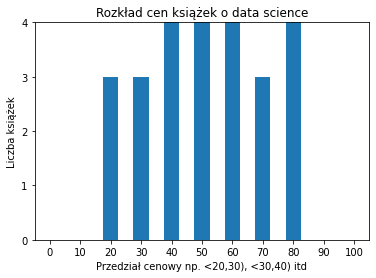

In [61]:
result = scrape()
# print("result =")
# print(result)

all_prices = []
for book_list in result:
    for book in book_list:
        print("Tytuł:")
        print(book.text.strip())
        print("Cena:", book["data-price"])
        all_prices.append(book["data-price"])
        print("Kategoria:", book["data-category"])

print("all_prices =")
print(all_prices)
print("Znaleziono", str(len(all_prices)), "książek")
prices_intervals = lambda price: float(price) // 10 * 10
print(prices_intervals)
histogram = Counter(prices_intervals(price) for price in all_prices)

plt.bar([x for x in histogram.keys()],
        histogram.values(),
        5)
plt.axis([-5, 105, 0, 4])
plt.xticks([10 * i for i in range(11)])
plt.yticks([0, 1, 2, 3, 4])
plt.xlabel("Przedział cenowy np. <20,30), <30,40) itd")
plt.ylabel("Liczba książek")
plt.title("Rozkład cen książek o data science")
plt.show()